In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from collections import Counter
from operator import itemgetter

In [50]:
def custom_sort(t):
    return t[1]

G = nx.Graph()
n = 3
m = 2
N = range(n)
newN = 2000
nodes = list(N)
G.add_nodes_from(nodes)
for i in G.nodes():
    while len(list(G.neighbors(i))) < 1:
        n2 = rn.choice(nodes)
        if i != n2 and n2 not in list(G.edges(i)) and n2 not in list(G.edges(n2)):
            G.add_edge(i,n2)

#nN = n+1
#G.add_node(nN)
#e1 = rn.choice(nodes)
#G.add_edge(nN,e1)
#nodes.remove(e1)
#e2 = rn.choice(nodes)
#G.add_edge(nN,e2)            
NW = n+1

while NW <= newN:
    #degreesum = np.sum(G.degree())
    #for k in G.nodes():
        #prob = G.degree(k)/(2 * len(G.edges()))
    lista = list(G.nodes())
    ee1 = rn.choice(lista)
    lista.remove(ee1)
    ee2 = rn.choice(lista)
    G.add_node(NW)
    G.add_edge(ee1,NW)
    G.add_edge(ee2,NW)
    #l = list(G.degree(G.nodes()))
    #l.sort(key=custom_sort, reverse = True)
    #degree = l[0:m]
    #maxde = [w[0] for w in degree]
    #for k in range(m):
    #    if n != maxde[k]:
    #        G.add_edge(NW, maxde[k])
    NW += 1

Number of edges:  3996
Degrees:  [(2, 20), (7, 17), (13, 17), (50, 17), (6, 16), (9, 16), (0, 15), (11, 15), (34, 15), (40, 15)]
Number of edges:  3996
Number of nodes:  2000
Average degree:  7.5
Variance of the degree distribution:  42.25


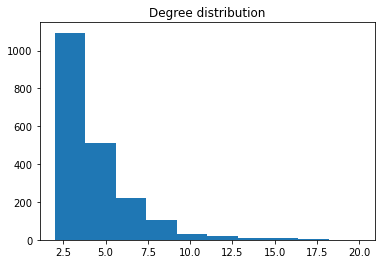

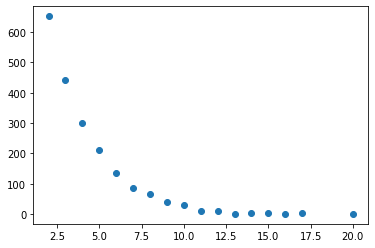

In [51]:

#GRAPH PLOT
#plt.title(r"$n = %.2f$"%newN)
#nx.draw_circular(G,with_labels=True)
#plt.savefig("C:/STUDIA, DOCS/APPLIED MATHEMATICS/SEMESTER 1/Diffusion processes on complex networks/Barabasi_Albert30.png")
#plt.show()

#DATA ANALUSYIS
num = G.number_of_edges()
l = list(G.degree(G.nodes()))
l.sort(key=custom_sort, reverse = True)
print('Number of edges: ', num)
print('Degrees: ', l[0:10])
vert = G.number_of_nodes()
aver_degree = np.mean(list(G.degree())[1])  #2*num/vert     #np.mean(G.degree())
var_de = np.var(list(G.degree())[1])
print('Number of edges: ', num)
print('Number of nodes: ', vert)
print('Average degree: ', aver_degree)
print('Variance of the degree distribution: ', var_de)

#Degree distribution
def degree_dist(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.figure(1)
    plt.title('Degree distribution')
    plt.hist(degrees)
    plt.show()
    plt.figure(2)
    degree_counts = Counter(degrees)                                                                                                 
    x, y = zip(*degree_counts.items())
    plt.scatter(x,y)                                                                                                    
    plt.show()
    
degree_dist(G)

Number of edges:  3996
Degrees:  [(8, 139), (2, 80), (7, 56), (5, 50), (14, 46), (114, 44), (12, 42), (15, 40), (11, 38), (39, 38)]
Number of edges:  3996
Number of nodes:  2000
Average degree:  12.5
Variance of the degree distribution:  132.25


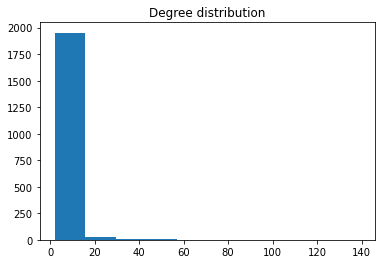

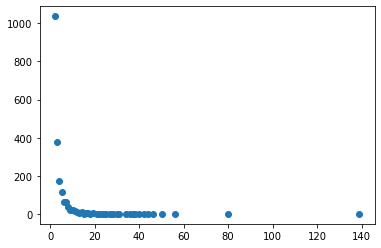

In [52]:
def custom_sort(t):
    return t[1]

ba=nx.barabasi_albert_graph(newN,2)

#GRAPH PLOT
#plt.title(r"$n = %.2f$"%newN)
#nx.draw_circular(ba,with_labels=True)
#plt.savefig("C:/STUDIA, DOCS/APPLIED MATHEMATICS/SEMESTER 1/Diffusion processes on complex networks/Barabasi_Albertbuildin30.png")
#plt.show()

numBA = ba.number_of_edges()
l = list(ba.degree(ba.nodes()))
l.sort(key=custom_sort, reverse = True)
print('Number of edges: ', numba)
print('Degrees: ', l[0:10])
vertBA = ba.number_of_nodes()
aver_degreeBA = np.mean(list(ba.degree())[1])   #2*numBA/vertBA 
var_deBA = np.var(list(ba.degree())[1])
print('Number of edges: ', numBA)
print('Number of nodes: ', vertBA)
print('Average degree: ', aver_degreeBA)
print('Variance of the degree distribution: ', var_deBA)


#Degree distribution   
degree_dist(ba)

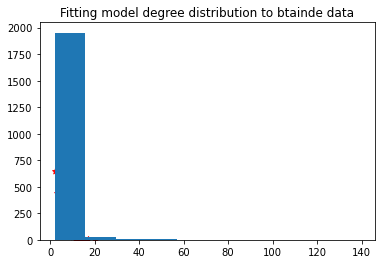

In [54]:
#FITIING MODEL DEGREE DISTRIBUTION TO OBTAINED DATA
degrees = [G.degree(n) for n in G.nodes()]
degreesba = [ba.degree(n) for n in ba.nodes()]
plt.figure(1)
plt.title('Fitting model degree distribution to btainde data')
plt.hist(degreesba) #histogram - data from build in function erdos_renyi_graph(n,p)
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())
plt.scatter(x,y, marker='*', color="red")   #from obtainde data via implemented function                                                                                                 
plt.show()